In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Class for particle in 2D 
Writing RK4 for 2D using particle1d.py

In [155]:
class Particle2D (object):
    m = 1.0
    def __init__(self, x0 = 0.0, y0 = 0.0, vx0 = 0.0, vy0 = 5, tf = 10.0, dt = 0.001):
        self.x1 = x0
        self.x2 = y0
        self.v1 = vx0
        self.v2 = vy0
        self.t = 0.0
        self.tf = tf
        self.dt = dt
        self.tlabel = 'time (s)'
        self.x1label = 'x (m)'
        self.x2label = 'y (m)'
        self.v1label = 'v_x (m/s)'
        self.v2label = 'v_y (m/s)'
        npoints = int(tf/dt) #starting at t = 0.0
        self.npoints = npoints
        self.tarray = np.linspace(0.0, tf,npoints, endpoint = True) # include final timepoint
        self.xv0 = np.array([self.x1, self.v1]) #initial x-position and x-velocity
        self.yv0 = np.array([self.x2, self.v2]) #initial y-position and y-velocity
    def F(self, x1, x2, v1, v2, t):
        return np.array([0, 0])
    def RK4_step(self): # first dimension
        a1_1 = self.F(self.x1, self.x2, self.v1, self.v2, self.t)[0] / self.m
        k1_1 = np.array([self.v1, a1_1])*self.dt
        a2_1 = self.F(self.x1+k1_1[0]/2, self.x2, self.v1+k1_1[1]/2, self.v2, self.t+self.dt/2)[0] / self.m
        k2_1 = np.array([self.v1+k1_1[1]/2, a2_1])*self.dt
        a3_1 = self.F(self.x1+k2_1[0]/2, self.x2, self.v1+k2_1[1]/2, self.v2, self.t+self.dt/2)[0] / self.m
        k3_1 = np.array([self.v1+k2_1[1]/2, a3_1])*self.dt
        a4_1 = self.F(self.x1+k3_1[0], self.x2, self.v1+k3_1[1], self.v2, self.t+self.dt)[0] / self.m
        k4_1 = np.array([self.v1+k3_1[1], a4_1])*self.dt
        self.x1 += (k1_1[0]+ k4_1[0])/6 + (k2_1[0] + k3_1[0])/3
        self.v1 += (k1_1[1]+ k4_1[1])/6 + (k2_1[1] + k3_1[1])/3
        # y direction 
        a1_2 = self.F(self.x1, self.x2, self.v1, self.v2, self.t)[1] / self.m
        k1_2 = np.array([self.v2, a1_2])*self.dt
        a2_2 = self.F(self.x1, self.x2 + k1_2[0]/2, self.v1, self.v2 + k1_2[1]/2, self.t+self.dt/2)[1] / self.m
        k2_2 = np.array([self.v2 + k1_2[1]/2, a2_2])*self.dt
        a3_2 = self.F(self.x1, self.x2 + k2_2[0]/2, self.v1, self.v2 + k2_2[1]/2, self.t+self.dt/2)[1] / self.m
        k3_2 = np.array([self.v2 + k2_2[1]/2, a3_2])*self.dt
        a4_2 = self.F(self.x1, self.x2 + k3_2[0], self.v1, self.v2 + k3_2[1], self.t+self.dt)[1] / self.m
        k4_2 = np.array([self.v2 + k3_2[1], a4_2])*self.dt
        self.x2 += (k1_2[0]+ k4_2[0])/6 + (k2_2[0] + k3_2[0])/3
        self.v2 += (k1_2[1]+ k4_2[1])/6 + (k2_2[1] + k3_2[1])/3
        if self.x2 < 0:
            self.x2 = 0
            self.v2 = 0
            self.v1 = 0
        self.t += self.dt
    def RK4_trajectory(self): # Trajectory, Initializing
        x1_RK4 = []
        x2_RK4 = []
        v1_RK4 = []
        v2_RK4 = []
        for ii in range(self.npoints):
            x1_RK4.append(self.x1)
            x2_RK4.append(self.x2)
            v1_RK4.append(self.v1)
            v2_RK4.append(self.v2)
            self.RK4_step()
        self.x1_RK4 = np.array(x1_RK4)
        self.x2_RK4 = np.array(x2_RK4)
        self.v1_RK4 = np.array(v1_RK4)
        self.v2_RK4 = np.array(v2_RK4)

# Problem 1:
Using RK4 written above. SOlving x and y spearetly.

In [ ]:
class DragParticle(Particle2D):
    def __init__(self, m = 1, x0 = 0.0, y0 = 0.0, vx0 = 1.0, vy0 = 0.0, tf = 30.0, dt = 0.01, A = 1.0):
        self.m = m
        self.A = A
        super().__init__(x0,y0,vx0,vy0,tf,dt) # calling the super class
    def F(self, x1, x2, v1, v2, t):
        g = -9.8
        a = 6.5 * 10**-3
        alpha = 2.5
        T = 300 # T in Kelvins
        ro0 = 1.225 # sea level air density
        ro = ro0 * (1 - (a*x2)/T)**alpha
        Fx = -(1/4) * ro * self.A * v1*np.abs(v1) #drag force in x direction
        Fy = -(1/4) * ro * self.A * v2*np.abs(v2) #drag force in y direction
        return np.array([Fx, Fy + self.m*g])
    def F_constant(self, x1, x2, v1, v2, t): #if constant force use this
        g = -9.8 # gravitational acceleration m/s^2
        a = 6.5 * 10**-3 #k/m given in the problem
        alpha = 2.5 # given in the problem
        T = 300 # Temperature in Kelvin
        ro0 = 1.225 # air density at sea level in kg/m^3
        ro = ro0
        Fx = -(1/4) * ro * self.A * v1*np.abs(v1)
        Fy = -(1/4) * ro * self.A * v2*np.abs(v2)
        return np.array([Fx, Fy + self.m*g])
    def RK4_step_constant(self): # Just rewriting the same RK4 but using the constant F
        a1_1 = self.F_constant(self.x1, self.x2, self.v1, self.v2, self.t)[0] / self.m
        k1_1 = np.array([self.v1, a1_1])*self.dt
        a2_1 = self.F_constant(self.x1+k1_1[0]/2, self.x2, self.v1+k1_1[1]/2, self.v2, self.t+self.dt/2)[0] / self.m
        k2_1 = np.array([self.v1+k1_1[1]/2, a2_1])*self.dt
        a3_1 = self.F_constant(self.x1+k2_1[0]/2, self.x2, self.v1+k2_1[1]/2, self.v2, self.t+self.dt/2)[0] / self.m
        k3_1 = np.array([self.v1+k2_1[1]/2, a3_1])*self.dt
        a4_1 = self.F_constant(self.x1+k3_1[0], self.x2, self.v1+k3_1[1], self.v2, self.t+self.dt)[0] / self.m
        k4_1 = np.array([self.v1+k3_1[1], a4_1])*self.dt
        self.x1 += (k1_1[0]+ k4_1[0])/6 + (k2_1[0] + k3_1[0])/3
        self.v1 += (k1_1[1]+ k4_1[1])/6 + (k2_1[1] + k3_1[1])/3
        a1_2 = self.F_constant(self.x1, self.x2, self.v1, self.v2, self.t)[1] / self.m
        k1_2 = np.array([self.v2, a1_2])*self.dt
        a2_2 = self.F_constant(self.x1, self.x2 + k1_2[0]/2, self.v1, self.v2 + k1_2[1]/2, self.t+self.dt/2)[1] / self.m
        k2_2 = np.array([self.v2 + k1_2[1]/2, a2_2])*self.dt
        a3_2 = self.F_constant(self.x1, self.x2 + k2_2[0]/2, self.v1, self.v2 + k2_2[1]/2, self.t+self.dt/2)[1] / self.m
        k3_2 = np.array([self.v2 + k2_2[1]/2, a3_2])*self.dt
        a4_2 = self.F_constant(self.x1, self.x2 + k3_2[0], self.v1, self.v2 + k3_2[1], self.t+self.dt)[1] / self.m
        k4_2 = np.array([self.v2 + k3_2[1], a4_2])*self.dt
        self.x2 += (k1_2[0]+ k4_2[0])/6 + (k2_2[0] + k3_2[0])/3
        self.v2 += (k1_2[1]+ k4_2[1])/6 + (k2_2[1] + k3_2[1])/3
        if self.x2 < 0:
            self.x2 = 0
            self.v2 = 0
        self.t += self.dt
    def RK4_trajectory_constant(self): # calculating trajectory for constant force case
        x1_RK4 = []
        x2_RK4 = []
        v1_RK4 = []
        v2_RK4 = []
        for ii in range(self.npoints):
            x1_RK4.append(self.x1)
            x2_RK4.append(self.x2)
            v1_RK4.append(self.v1)
            v2_RK4.append(self.v2)
            self.RK4_step_constant()
        self.x1_RK4 = np.array(x1_RK4)
        self.x2_RK4 = np.array(x2_RK4)
        self.v1_RK4 = np.array(v1_RK4)
        self.v2_RK4 = np.array(v2_RK4)

In [ ]:
projectile = DragParticle(m = 10, x0 = 0.0, vy0 = 200, A = 0.01, tf = 80)
projectile.RK4_trajectory()

projectile_noDrag = DragParticle(m = 10, x0 = 0.0, vy0 = 200, A = 0.00, tf = 80)
projectile_noDrag.RK4_trajectory()

projectile_constant = DragParticle(m = 10, x0 = 0.0, vy0 = 200, A = 0.01, tf = 80)
projectile_constant.RK4_trajectory_constant()

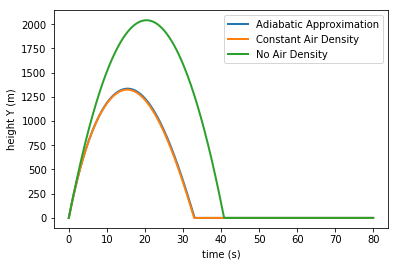

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(projectile.tarray, projectile.x2_RK4, lw = 2, label = "Adiabatic Approximation")
ax.plot(projectile_constant.tarray, projectile_constant.x2_RK4, lw = 2, label = "Constant Air Density")
ax.plot(projectile_noDrag.tarray, projectile_noDrag.x2_RK4, lw = 2, label = "No Air Density")
plt.legend(loc = "upper right",fontsize = 10)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("height Y (m)", fontsize = 10)
plt.show()

Maximum Range vs launching Angle: 

In [145]:
range_case1 = [] #with Drag
range_case2 = [] # No drag
v = 50 #finding angle at low velocity
angles = range(5,90,10)
for angle in angles: # components of V in x and y directions:
    vx_initial = v*np.cos(np.radians(angle))
    vy_initial = v*np.sin(np.radians(angle))
    Drag_case = DragParticle(m = 10, vx0 = vx_initial, vy0 = vy_initial, A = 0.01, tf = 100)
    Drag_case.RK4_trajectory() #setting A = 0 for no drag
    NoDrag_case = DragParticle(m = 10, vx0 = vx_initial, vy0 = vy_initial, A = 0.0, tf = 100)
    NoDrag_case.RK4_trajectory()
    range_case1.append(max(Drag_case.x1_RK4))
    range_case2.append(max(NoDrag_case.x1_RK4))

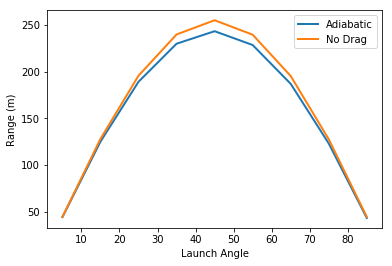

45
45


In [150]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5,90,10),range_case1, lw = 2, label = "Adiabatic")
ax.plot(range(5,90,10),range_case2, lw = 2, label = "No Drag")
plt.xlabel("Launch Angle")
plt.ylabel("Range (m)")
plt.legend()
plt.show()
print(angles[np.argmax(range_case1)])
print(angles[np.argmax(range_case2)])

corresponding angles are 45 for adiabatic and 45 for No drag as well. 45 is what I was expecting. 

In [151]:
range_case1 = [] #with Drag
range_case2 = [] # No drag
v = 500 #finding angles at high velocity 
angles = range(5,90,10) # going from small angle to sraigh up, 90 degrees for every 10 degrees
for angle in angles: # components of V in x and y directions:
    vx_initial = v*np.cos(np.radians(angle))
    vy_initial = v*np.sin(np.radians(angle))
    Drag_case = DragParticle(m = 10, vx0 = vx_initial, vy0 = vy_initial, A = 0.01, tf = 100)
    Drag_case.RK4_trajectory()
    NoDrag_case = DragParticle(m = 10, vx0 = vx_initial, vy0 = vy_initial, A = 0.0, tf = 100)
    NoDrag_case.RK4_trajectory()
    range_case1.append(max(Drag_case.x1_RK4))
    range_case2.append(max(NoDrag_case.x1_RK4))

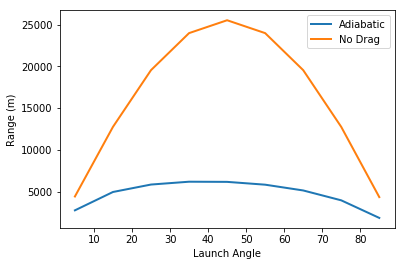

35
45


In [153]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(5,90,10),range_case1, lw = 2, label = "Adiabatic")
ax.plot(range(5,90,10),range_case2, lw = 2, label = "No Drag")
plt.xlabel("Launch Angle")
plt.ylabel("Range (m)")
plt.legend()
plt.show()
print(angles[np.argmax(range_case1)])
print(angles[np.argmax(range_case2)])

corresponding angles are 35 for Adiabatic model and 45 for no drag case

We expect the max range angle to be around 45. At relatively low velocity (50m/s) we see that there is almost no detectable affect from the drag force with respect to max range angle.
For higher speeds like 500 m/s the maximum range anlge is smaller because the projectile is experiencing more resistance going while traveling to a higher y, resistance decreases and it will reach higher y in this case. 

# Part b

In [138]:
class gofy(Particle2D): # gofy is g as a function of y
    def __init__(self, m = 1, x0 = 0.0, y0 = 0.0, vx0 = 5.0, vy0 = 0.0, tf = 20.0, dt = 0.01, A = 2.0):
        self.m = m
        self.A = A
        super().__init__(x0,y0,vx0,vy0,tf,dt)
    def F(self, x1, x2, v1, v2, t):
        Re = 6378000 
        g = -9.8 * (Re / (Re + x2))**2
        a = 6.5 * 10**-3
        alpha = 2.5
        T = 300
        rho0 = 1.225
        rho = rho0 * (1 - (a*x2)/T)**alpha
        Fx = -(1/4) * rho * self.A * v1*np.abs(v1)
        Fy = -(1/4) * rho * self.A * v2*np.abs(v2)
        return np.array([Fx, Fy + self.m*g])

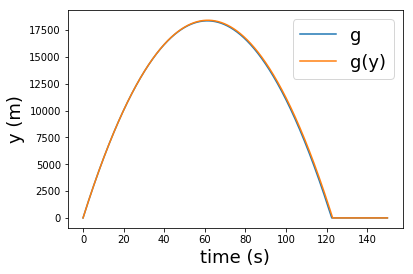

In [136]:
#No Drag
constant_g = DragParticle(m = 10, x0 = 0.0, vy0 = 600, A = 0.00, tf = 150, dt = 0.1)
constant_g.RK4_trajectory()
gofy = gofy(m = 10, x0 = 0.0, vy0 = 600, A = 0.00, tf = 150, dt = 0.1)
gofy.RK4_trajectory()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(constant_g.tarray, constant_g.x2_RK4, label = "g")
ax.plot(gofy.tarray, gofy.x2_RK4, label = "g(y)")
plt.legend(loc = "upper right",fontsize = 18)
plt.xlabel("time (s)", fontsize = 18)
plt.ylabel("y (m)", fontsize = 18)
plt.show()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


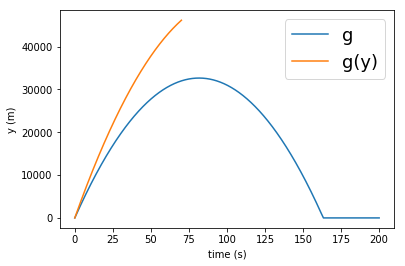

In [139]:
#No Drag
constant_g = DragParticle(m = 10, x0 = 0.0, vy0 = 800, A = 0.00, tf = 200, dt = 0.05)
constant_g.RK4_trajectory()
gofy = gofy(m = 10, x0 = 0.0, vy0 = 1000, A = 0.00, tf = 800, dt = 0.05)
gofy.RK4_trajectory()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(constant_g.tarray, constant_g.x2_RK4, label = "g")
ax.plot(gofy.tarray, gofy.x2_RK4, label = "g(y)")
plt.legend(loc = "upper right",fontsize = 18)
plt.xlabel("time (s)", fontsize = 10)
plt.ylabel("y (m)", fontsize = 10)
plt.show()

# Problem 2

In [176]:
class DragParticle(Particle2D):
    def __init__(self, m = 1, x0 = 0.0, y0 = 0.0, vx0 = 1.0, vz0 = 0.0, tf = 50.0, dt = 0.01, A = 1.0):
        self.m = m
        self.A = A
        super().__init__(x0,y0,vx0,vy0,tf,dt)
    def F_D(self, x1, x2, v1, v2, t):
        g = -9.8
        ro = 1.225 #sea level
        a = 0.25 #given
        b = 0.25 #given
        c = 0.16 #given
        # drag force x direction
        ki = (vx - vc)/4
        if v1 > vc:
            Cd = np.exp(-ki_x**2 / 4)
        else:
            Cd = np.exp(-ki_x**2)
            Cd_x = a + b/(1+np.exp(ki_x)) - c*Cd
            Fd_x = 0.5 * Cd_x * ro * self.A * v1*np.abs(v1)

        # z-component of drag force
        ki_y = (v2 - vc)/4
        if v2 > vc:
            Cd = np.exp(-ki_y**2 / 4)
        else:
            Cd = np.exp(-ki_y**2)
            Cd_y = a + b/(1+np.exp(ki_y)) - c*Cd
            Fd_y = 0.5 * Cd_y * ro * self.A * v2*np.abs(v2)
    def F_backspin(self, x1, x2, v1, v2, wy, t):
        self.m= 9
        g = -9.8 # gravitational acceleration m/s^2
        rw = 10
        wy= 10
        s = rw/v
        Cl = 0.5 * s**(1/4)
        alpha = 2.5 # given in the problem
        T = 300 # Temperature in Kelvin
        ro0 = 1.225 # air density at sea level in kg/m^3
        ro = ro0
        r = 0.5
        A = np.pi*r**2
        FMx = (0.5*Cl * ro* A*r)*(-wy*vz)/s
        FMz = (0.5*Cl * ro* A*r)*(-wy*vx)/s
        return np.array([FMx, self.m*g, FMz])
    def RK4_step_constant(self): # Just rewriting the same RK4 but with F backspin and FM
            a1_1 = (self.F_backspin(self.x1, self.x2, self.v1, self.v2, self.t)[0] + self.F_D(self.x1, self.x2, self.v1, self.v2, self.t)[0])/ self.m
            k1_1 = np.array([self.v1, a1_1])*self.dt
            a2_1 = (self.F_backspin(self.x1+k1_1[0]/2, self.x2, self.v1+k1_1[1]/2, self.v2, self.t+self.dt/2)[0]+self.F_D(self.x1+k1_1[0]/2, self.x2, self.v1+k1_1[1]/2, self.v2, self.t+self.dt/2)[0]) / self.m
            k2_1 = np.array([self.v1+k1_1[1]/2, a2_1])*self.dt
            a3_1 = (self.F_backspin(self.x1+k2_1[0]/2, self.x2, self.v1+k2_1[1]/2, self.v2, self.t+self.dt/2)[0]+self.F_D(self.x1+k2_1[0]/2, self.x2, self.v1+k2_1[1]/2, self.v2, self.t+self.dt/2)[0]) / self.m
            k3_1 = np.array([self.v1+k2_1[1]/2, a3_1])*self.dt
            a4_1 = (self.F_backspin(self.x1+k3_1[0], self.x2, self.v1+k3_1[1], self.v2, self.t+self.dt)[0]+self.F_D(self.x1+k3_1[0], self.x2, self.v1+k3_1[1], self.v2, self.t+self.dt)[0]) / self.m
            k4_1 = np.array([self.v1+k3_1[1], a4_1])*self.dt
            self.x1 += (k1_1[0]+ k4_1[0])/6 + (k2_1[0] + k3_1[0])/3
            self.v1 += (k1_1[1]+ k4_1[1])/6 + (k2_1[1] + k3_1[1])/3
            a1_2 = self.F_backspin(self.x1, self.x2, self.v1, self.v2, self.t)[1] / self.m
            k1_2 = np.array([self.v2, a1_2])*self.dt
            a2_2 = self.F_backspin(self.x1, self.x2 + k1_2[0]/2, self.v1, self.v2 + k1_2[1]/2, self.t+self.dt/2)[1] / self.m
            k2_2 = np.array([self.v2 + k1_2[1]/2, a2_2])*self.dt
            a3_2 = self.F_backspin(self.x1, self.x2 + k2_2[0]/2, self.v1, self.v2 + k2_2[1]/2, self.t+self.dt/2)[1] / self.m
            k3_2 = np.array([self.v2 + k2_2[1]/2, a3_2])*self.dt
            a4_2 = self.F_backspin(self.x1, self.x2 + k3_2[0], self.v1, self.v2 + k3_2[1], self.t+self.dt)[1] / self.m
            k4_2 = np.array([self.v2 + k3_2[1], a4_2])*self.dt
            self.x2 += (k1_2[0]+ k4_2[0])/6 + (k2_2[0] + k3_2[0])/3
            self.v2 += (k1_2[1]+ k4_2[1])/6 + (k2_2[1] + k3_2[1])/3
            if self.x2 < 0:
                self.x2 = 0
                self.v2 = 0
            self.t += self.dt

    def RK4_trajectory_constant(self): # calculating trajectory
            x1_RK4 = []
            x2_RK4 = []
            v1_RK4 = []
            v2_RK4 = []
            for ii in range(self.npoints):
                x1_RK4.append(self.x1)
                x2_RK4.append(self.x2)
                v1_RK4.append(self.v1)
                v2_RK4.append(self.v2)
                self.RK4_step_constant()
            self.x1_RK4 = np.array(x1_RK4)
            self.x2_RK4 = np.array(x2_RK4)
            self.v1_RK4 = np.array(v1_RK4)
            self.v2_RK4 = np.array(v2_RK4)    

In [177]:
projectile = DragParticle(m = 10, x0 = 0.0, vy0 = 200, A = 0.01, tf = 80)
projectile.RK4_trajectory()

projectile_noDrag = DragParticle(m = 10, x0 = 0.0, vy0 = 200, A = 0.00, tf = 80)
projectile_noDrag.RK4_trajectory()

projectile_constant = DragParticle(m = 10, x0 = 0.0, vy0 = 200, A = 0.01, tf = 80)
projectile_constant.RK4_trajectory_constant()

NameError: name 'vz' is not defined